<a href="https://colab.research.google.com/github/KayalvizhiT513/Gradient_Descent_Comparison/blob/main/SGD_with_5_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

In [150]:
# Generate 5 data points
X = np.array([1, 2, 3, 4, 5])
Y = 5 * X + 4.5 + np.random.normal(0, 2, size=len(X))

# Add a lot more noise to 2 points
Y[1] += np.random.normal(0, 10)
Y[3] += np.random.normal(0, 10)

In [133]:
print(X)

[1 2 3 4 5]


In [151]:
print(Y)

[10.49342831 11.88210183 20.79537708 43.33818787 29.03169325]


In [135]:
print(5*X+4.5)

[ 9.5 14.5 19.5 24.5 29.5]


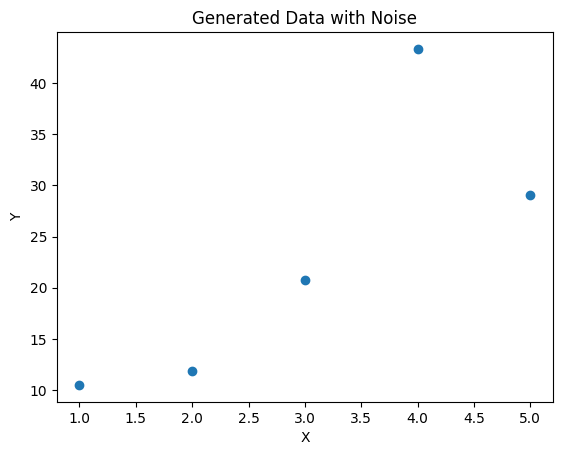

In [152]:
# Plot the data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data with Noise')
plt.show()

In [139]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [140]:
import matplotlib.pyplot as plt

# Function to plot epoch vs. loss
def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

In [141]:
# Function to plot the data and regression line
def plot_regression_line(X, Y, w0, w1, title):
    plt.scatter(X, Y, label='Data')
    plt.plot(X, w0 + w1 * X, color='red', label='Predicted Line')
    plt.plot(X, 4.5 + 5 * X, color='blue', label='Original Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

In [156]:
def gradient_descent(X, Y, w0, w1, learning_rate, epochs=5000, tol=1, consecutive_instances=5):
    n = len(X)
    count = 0
    prev_loss = float('inf')

    for epoch in range(epochs):
        # Calculate predictions and loss
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        # Calculate gradients
        gradient_w0 = -2 * np.mean(Y - predictions)
        gradient_w1 = -2 * np.mean((Y - predictions) * X)

        # Update weights
        w0 -= learning_rate * gradient_w0
        w1 -= learning_rate * gradient_w1

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
            count += 1
        else:
            count = 0

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged!")
            break

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the loss history
        loss_history_gd.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Update initial weights and run gradient descent
w_0 = 0.0
w_1 = 0.0
learning_rate = 0.07
loss_history_gd = []
w0, w1 = gradient_descent(X, Y, w_0, w_1, learning_rate)
print(f"Final weights: w0={w0}, w1={w1}")


Epoch 0, Loss: 680.9563659753371
Epoch 13, Loss: 53.081670122403395
Converged!
Final weights: w0=2.111232714269049, w1=6.953535238570626


<ipython-input-139-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


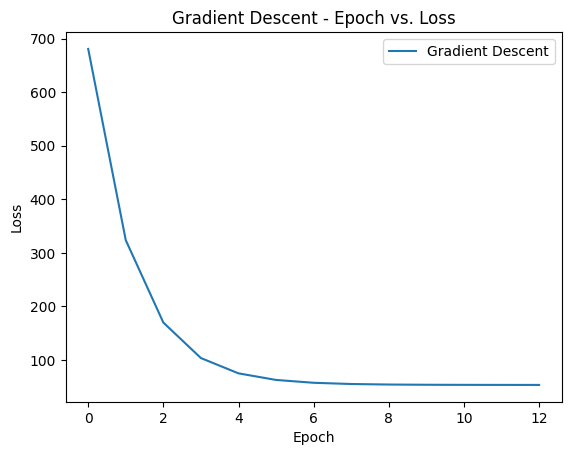

In [157]:
# Plot the loss vs. epoch graph for gradient descent
plot_loss_vs_epoch(loss_history_gd, 'Gradient Descent')

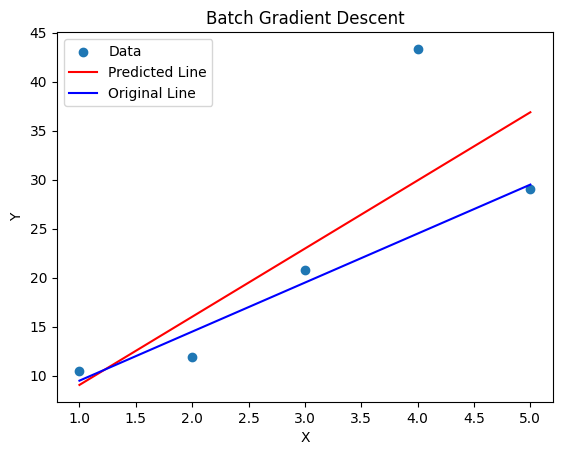

In [158]:
# Plot the data and regression line for Batch GD
plot_regression_line(X, Y, w0, w1, 'Batch Gradient Descent')

In [162]:
# Step 3: Define SGD function
def sgd_one_sample(X, Y, w0, w1, learning_rate, epochs=6000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0
    for epoch in range(epochs):
        losses = []
        weights0 = []
        weights1 = []
        for i in range(n):
            # Select one random data point
            random_index = np.random.randint(0, n)
            x_i = X[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x_i

            # Update weights
            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1

            losses.append(loss)
            weights0.append(w0)
            weights1.append(w1)

        losses_set.append(losses)
        weight0_set.append(weights0)
        weight1_set.append(weights1)


        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1, losses_set, weight0_set, weight1_set

# Step 4: Run SGD with one training sample at a time
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.002
loss_history_sgd_one_sample = []
losses_set = []
weight0_set = []
weight1_set = []
w0_sgd_one_sample, w1_sgd_one_sample, losses_set, weight0_set, weight1_set = sgd_one_sample(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}")

Epoch 0, Loss: 348.7268385977867
Epoch 500, Loss: 59.00258096397869
Epoch 1000, Loss: 54.182872639950574
Epoch 1437, Loss: 53.04085568935227
Converged! 
Final weights for SGD with one sample: w0=2.661837725617373, w1=6.804508149405716


<ipython-input-139-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


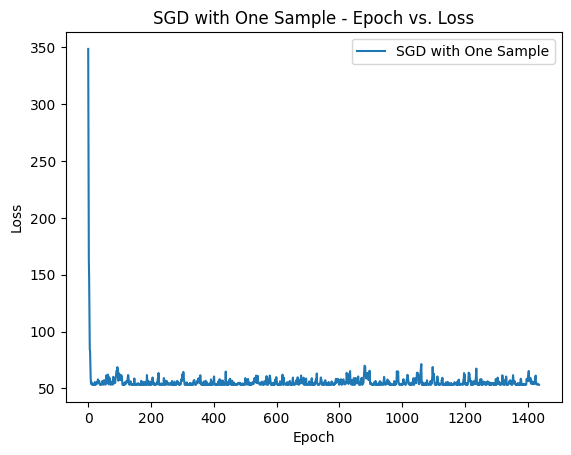

In [163]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with One Sample')

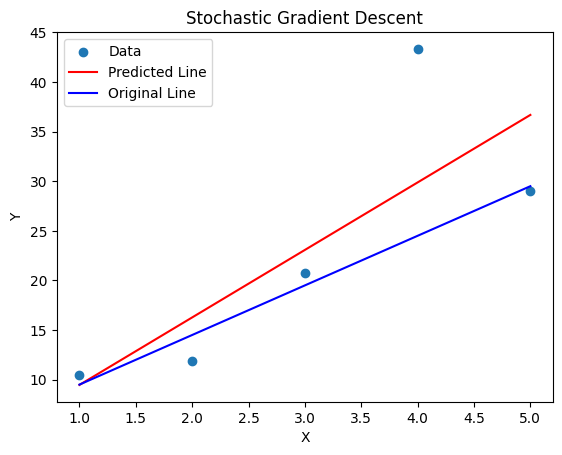

In [164]:
# Plot the data and regression line for SGD
plot_regression_line(X, Y, w0_sgd_one_sample, w1_sgd_one_sample, 'Stochastic Gradient Descent')


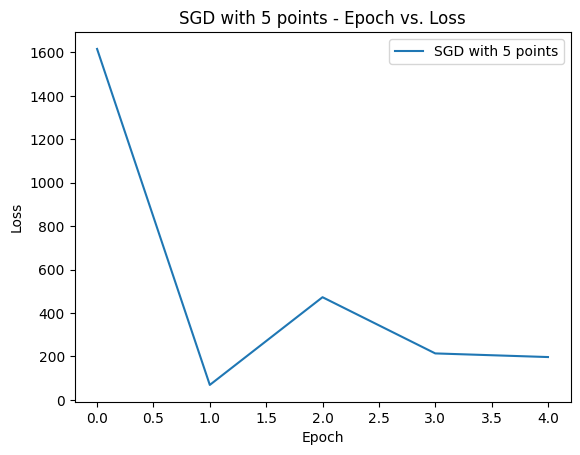

In [165]:
plot_loss_vs_epoch(losses_set[0], 'SGD with 5 points')

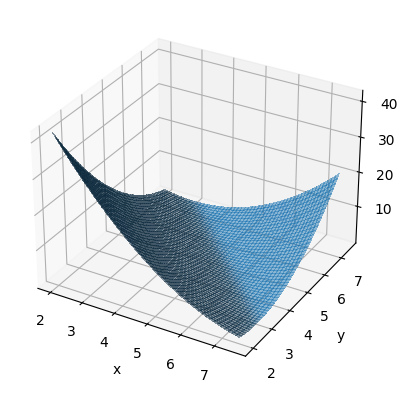

In [ ]:
#parabaloid
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#creating grid
y = np.linspace(2,7.5,1000)
x = np.linspace(2,7.5,1000)
x,y = np.meshgrid(x,y)

#set z values
z = (10.49342831 - (x + y))**2

#label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plot figure
ax.plot_surface(x,y,z,linewidth=0, antialiased=False, shade = True, alpha = 0.5)

plt.show()

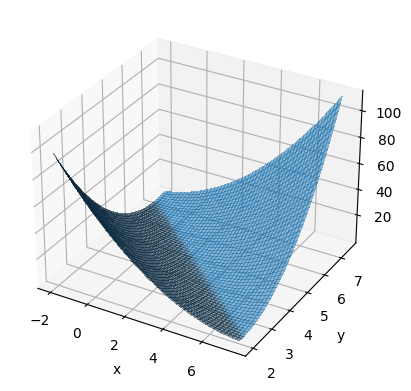

In [24]:
#parabaloid
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#creating grid
y = np.linspace(2,7.5,1000)
x = np.linspace(-2,7.5,1000)
x,y = np.meshgrid(x,y)

#set z values
z = (11.88210183 - (x + 2*y))**2

#label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plot figure
ax.plot_surface(x,y,z,linewidth=0, antialiased=False, shade = True, alpha = 0.5)

plt.show()

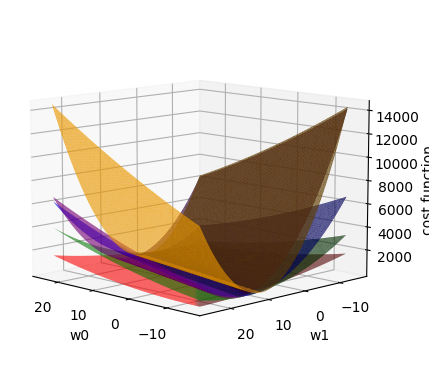

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# Generate 5 data points
X_dp = np.array([1, 2, 3, 4, 5])
Y_dp = 5 * X_dp + 4.5 + np.random.normal(0, 2, size=len(X_dp))

# Add a lot more noise to 2 points
Y_dp[1] += np.random.normal(0, 10)
Y_dp[3] += np.random.normal(0, 10)

def generate(a, b):
    x = np.linspace(-15.5, 24.5, 100)
    y = np.linspace(-15, 25, 100)
    w0, w1 = np.meshgrid(x, y)
    Z=(a-(w0 + b * w1))**2
    return w0, w1, Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(len(X_dp)):
    X, Y, Z= generate(Y_dp[i],X_dp[i])#a,b
    ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), color=colors[i], alpha=0.8)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('cost function')

ax.view_init(elev=10, azim=135)
plt.show()


In [64]:
X_dp

array([1., 2., 3., 4., 5., 3.])

In [65]:
Y_dp

array([10.49342831, 11.88210183, 20.79537708, 43.33818787, 29.03169325,
       23.10815767])

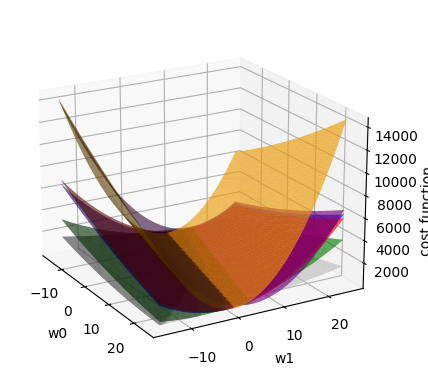

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# Generate 5 data points
X_dp = np.array([1, 2, 3, 4, 5])
Y_dp = 5 * X_dp + 4.5 + np.random.normal(0, 2, size=len(X_dp))

# Add a lot more noise to 2 points
Y_dp[1] += np.random.normal(0, 10)
Y_dp[3] += np.random.normal(0, 10)

#Adding average points
X_dp = np.append(X_dp, np.mean(X_dp))
Y_dp = np.append(Y_dp, np.mean(Y_dp))

def generate(a, b):
    x = np.linspace(-15.5, 24.5, 100)
    y = np.linspace(-15, 25, 100)
    w0, w1 = np.meshgrid(x, y)
    Z=(a-(w0 + b * w1))**2
    return w0, w1, Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['silver', 'green', 'blue', 'purple', 'orange', 'red']
for i in range(len(X_dp)):
    X, Y, Z= generate(Y_dp[i],X_dp[i])#a,b
    ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), color=colors[i], alpha=0.8)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('cost function')

ax.view_init(elev=20, azim=-30)
plt.show()


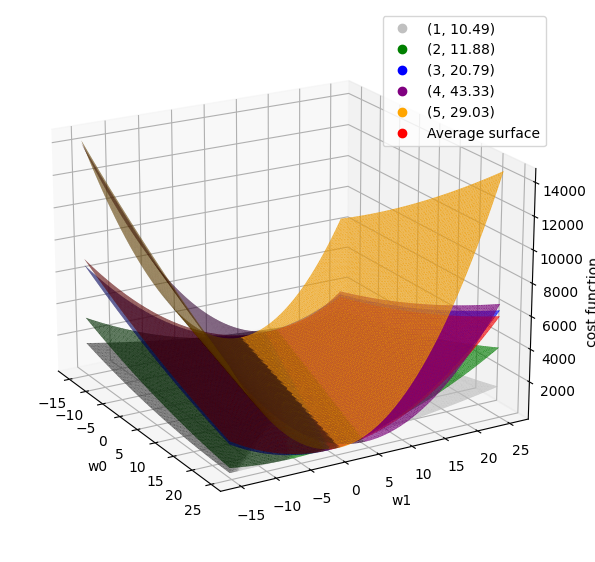

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Example data
np.random.seed(42)
X_dp = np.array([1, 2, 3, 4, 5])
Y_dp = 5 * X_dp + 4.5 + np.random.normal(0, 2, size=len(X_dp))
Y_dp[1] += np.random.normal(0, 10)
Y_dp[3] += np.random.normal(0, 10)
X_dp = np.append(X_dp, np.mean(X_dp))
Y_dp = np.append(Y_dp, np.mean(Y_dp))

def generate(a, b):
    x = np.linspace(-15.5, 24.5, 100)
    y = np.linspace(-15, 25, 100)
    w0, w1 = np.meshgrid(x, y)
    Z = (a - (w0 + b * w1))**2
    return w0, w1, Z

fig = plt.figure(figsize = (7, 15))
ax = fig.add_subplot(111, projection='3d')

colors = np.array(['silver', 'green', 'blue', 'purple', 'orange', 'red'])
labels = np.array(['(1, 10.49)', '(2, 11.88)', '(3, 20.79)', '(4, 43.33)', '(5, 29.03)', 'Average surface'])
legend_handles = []

for i in range(len(X_dp)):
    X, Y, Z = generate(Y_dp[i], X_dp[i])
    surf = ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), color=colors[i], alpha=0.8)
    legend_entry = Line2D([0], [0], linestyle='None', color=colors[i], marker='o', label=labels[i])
    legend_handles.append(legend_entry)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('cost function')

ax.view_init(elev=20, azim=-30)

# Consolidate legend entries outside the loop
ax.legend(handles=legend_handles)

plt.show()


In [111]:
from matplotlib.legend_handler import HandlerBase

class HandlerPolyCollection(HandlerBase):

    def _update_prop(self, legend_handle, orig_handle):
        def first_color(colors):
            print(colors)  # added to check
            colors = np.array(colors)  # added to fix
            if len(colors) == 0:
                return (0, 0, 0, 0)
            return tuple(colors[0])

labels = np.array(['(1, 10.49)', '(2, 11.88)', '(3, 20.79)', '(4, 43.33)', '(5, 29.03)', 'Average surface'])

In [127]:
Y_dp

array([10.49342831, 11.88210183, 20.79537708, 43.33818787, 29.03169325,
       23.10815767])